In [1]:
# SVM with second dataset
import numpy as np

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix # for confusion matrix

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maitreyee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
true_data=pd.read_csv('True.csv')
fake_data=pd.read_csv('Fake.csv')



In [6]:
print(true_data['text'][0])
true_data.columns

WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educati

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [7]:
print(true_data[0:10])
fake_data[0:4]

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   
5  White House, Congress prepare for talks on spe...   
6  Trump says Russia probe will be fair, but time...   
7  Factbox: Trump on Twitter (Dec 29) - Approval ...   
8         Trump on Twitter (Dec 28) - Global Warming   
9  Alabama official to certify Senator-elect Jone...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) -

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"


In [8]:
len(true_data)

21417

In [9]:
len(fake_data)

23481

In [10]:
fake_data['label'] = 1
true_data['label']=0
print(true_data.head())
fake_data.head()

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  label  
0  December 31, 2017       0  
1  December 29, 2017       0  
2  December 31, 2017       0  
3  December 30, 2017       0  
4  December 29, 2017       0  


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [11]:
all_data=pd.concat([fake_data, true_data])
random_permutation = np.random.permutation(len(all_data))       #shuffles the rows for mixing sammples
all_data= all_data.iloc[random_permutation]
print(all_data.columns)
all_data.head()

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')


,title,text,subject,date,label
2855,Scientists Planning A March On Washington To ...,Now that the Women s March successfully outnum...,News,"January 25, 2017",1
2533,Hypocrite Republicans Refuse To Investigate F...,After years of investigating Hillary Clinton o...,News,"February 14, 2017",1
19235,Kurdish government holds meetings in Baghdad o...,"ERBIL, Iraq (Reuters) - A delegation from the ...",worldnews,"September 23, 2017",0
5293,Trump wants to make sure U.S. nuclear arsenal ...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"February 23, 2017",0
16589,"THE SALT POLICE? Yes, Salt Regulation Is Here ...",The salt police are coming to NYC! Thanks to...,Government News,"May 27, 2016",1


In [12]:
filterd_data=all_data.loc[:, ['title', 'text', "subject", 'label']]
filterd_data.head()

,title,text,subject,label
2855,Scientists Planning A March On Washington To ...,Now that the Women s March successfully outnum...,News,1
2533,Hypocrite Republicans Refuse To Investigate F...,After years of investigating Hillary Clinton o...,News,1
19235,Kurdish government holds meetings in Baghdad o...,"ERBIL, Iraq (Reuters) - A delegation from the ...",worldnews,0
5293,Trump wants to make sure U.S. nuclear arsenal ...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,0
16589,"THE SALT POLICE? Yes, Salt Regulation Is Here ...",The salt police are coming to NYC! Thanks to...,Government News,1


In [13]:
filterd_data.isnull().sum()

title      0
text       0
subject    0
label      0
dtype: int64

In [14]:
filterd_data['training_feature']=filterd_data['title']+' '+filterd_data['text']+' '+filterd_data['subject']   #text,title,sub concatenated
filterd_data.head()

,title,text,subject,label,training_feature
2855,Scientists Planning A March On Washington To ...,Now that the Women s March successfully outnum...,News,1,Scientists Planning A March On Washington To ...
2533,Hypocrite Republicans Refuse To Investigate F...,After years of investigating Hillary Clinton o...,News,1,Hypocrite Republicans Refuse To Investigate F...
19235,Kurdish government holds meetings in Baghdad o...,"ERBIL, Iraq (Reuters) - A delegation from the ...",worldnews,0,Kurdish government holds meetings in Baghdad o...
5293,Trump wants to make sure U.S. nuclear arsenal ...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,0,Trump wants to make sure U.S. nuclear arsenal ...
16589,"THE SALT POLICE? Yes, Salt Regulation Is Here ...",The salt police are coming to NYC! Thanks to...,Government News,1,"THE SALT POLICE? Yes, Salt Regulation Is Here ..."


In [15]:
X= filterd_data['training_feature'].values  #concatenated strings representing the combined features from the 'title', 'text', and 'subject' columns.
Y = filterd_data['label']                   #each sample is classified as fake or true news.

In [16]:
#l_X=filterd_data['training_feature'].values[0:1000]
#l_Y= filterd_data['label'].values[0:1000]

In [17]:
print(X.shape)
print(Y.shape)
type (X)

(44898,)
(44898,)


numpy.ndarray

In [18]:
print(X[0:1])

[' Scientists Planning A March On Washington To Protest Trump Now that the Women s March successfully outnumbered President Trump s pathetic inauguration (which humiliated and enraged him), there s a new group planning a march in the nation s capital: scientists.For years scientists have become the brunt of the GOP s rage over facts and environmentalism. Their echos of  Well, I m not a scientist  was always safeguarded by the intelligence and compassion of President Obama and his commitment to tackling the threat of climate change.Well now those are the days of that past, and we have a president who believes climate change is a  hoax  made up by the Chinese to make competition harder for the United States.And as such, it should come as no surprise that the new Administration is taking authoritarian measures to clamp down on scientists  ability to combat climate change. From blackouts to gag-orders, agencies responsible for scientific research (Agriculture, EPA, Park Services) have seen

In [19]:
port_stem= PorterStemmer()

In [20]:
def stemming(content):   #stemming is a function here
  stemmed_content = re.sub('[^a-zA-z]',' ',content)       #removes everything that is not btw aA-zZ(all numbers and puntuations replaced by space)
  stemmed_content = stemmed_content.lower()                #converts all uc to lc to avoid problem during processing
  stemmed_content = stemmed_content.split()                #all words and text will be splitted and converted to list
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [21]:
filterd_data['training_feature'] = filterd_data['training_feature'].apply(stemming)

In [22]:
#num_rows = int(len(filterd_data) *0.7)

In [23]:
X=filterd_data['training_feature'].values
Y= filterd_data['label'].values

In [24]:
vectorizer= TfidfVectorizer()    #X will be transformed into a sparse matrix representation of TF-IDF features
X=vectorizer.fit_transform(X)

In [25]:
#l_vectorizer= TfidfVectorizer()
#l_X=l_vectorizer.fit_transform(l_X)        #fit transform(): first learns the vocabulary from the input data (l_X) and then transforms the data into a document-term matrix.

In [26]:
print(type(X))
print(X.shape)
print(type(X))
print(X.shape)

<class 'scipy.sparse._csr.csr_matrix'>
(44898, 91011)
<class 'scipy.sparse._csr.csr_matrix'>
(44898, 91011)


This output indicates that X is a sparse matrix representation of the TF-IDF features, specifically in Compressed Sparse Row (CSR) format.
(features,samples)

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, stratify=Y, random_state=42)

1. 20% of the data will be reserved for testing, and the remaining 80% will be used for training.
2. ensures that the class distribution is preserved in both the training and testing datasets.
3. sets the random seed for reproducibility

In [65]:
#l_X_train, l_X_test, l_Y_train, l_Y_test = train_test_split(l_X, l_Y, test_size = 0.2, random_state=42)

In [66]:
X_train.shape

(22449, 91011)

In [67]:
from sklearn import svm

#Create a svm Classifier
model = svm.SVC(kernel='linear') # Linear Kernel


In [68]:
print(X_train.shape)
# X_train.iloc[0:1000].shape    # shape of the first 1000 rows of X_train while preserving all columns.

(22449, 91011)


model training

In [69]:
#Train the model using the training sets
model.fit(X_train, Y_train)
# clf_poly.fit(X_train,Y_train)

SVC(kernel='linear')

In [70]:
#Predict the response for test dataset
y_pred = model.predict(X_test)


In [71]:
#accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [72]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9989754554768586


In [73]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test )

In [74]:
print('Accuracy score on test data = ', test_data_accuracy)

Accuracy score on test data =  0.995144549868591


In [75]:
from sklearn.metrics import precision_score

# Assuming you have already made predictions on both training and testing data

# Concatenate predictions and true labels
y_pred_combined = np.concatenate([X_train_prediction, y_pred])
Y_combined = np.concatenate([Y_train, Y_test])

# Calculate precision on the combined dataset
combined_precision = precision_score(Y_combined, y_pred_combined)
print("Combined Precision:", combined_precision)



Combined Precision: 0.9979951371411508


In [76]:
from sklearn.metrics import precision_score

# Assuming you have already split your data into training and testing sets and trained your model

# Make predictions on the testing data
y_test_prediction = model.predict(X_test)

# Evaluate precision on testing data
test_precision = precision_score(Y_test, y_test_prediction)
print("Testing Precision:", test_precision)

Testing Precision: 0.9966692287983603


In [77]:
from sklearn.metrics import f1_score, recall_score

# Assuming you have true labels 'y_true' and predicted labels 'y_pred'

# Calculate F1 score
f1 = f1_score(Y_test, y_test_prediction)
print("Testing F1 score: ", f1)
# Calculate recall
recall = recall_score(Y_test, y_test_prediction)
print("Testing recall: ", recall)

Testing F1 score:  0.995351614141328
Testing recall:  0.9940374787052811


In [49]:
#performing cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Define k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, Y, cv=k_fold, scoring='accuracy')

# Print average performance
print("Average Accuracy:", np.mean(scores))

Average Accuracy: 0.9965254636468017


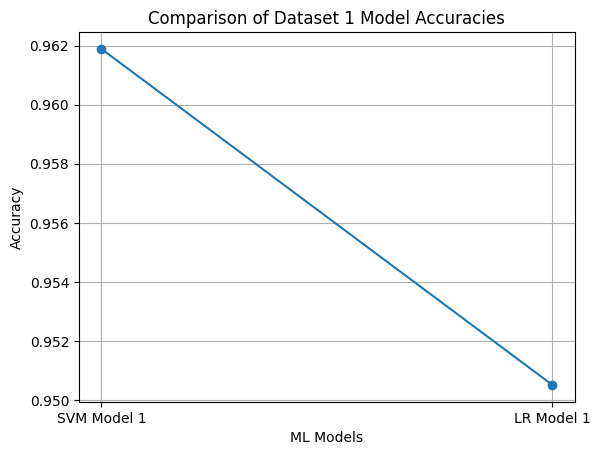

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values for SVM model 1 and model 1
accuracy_svm1 = 0.9618906211333829
accuracy_LR1 = 0.9505073001732245

# Model names
models = ['SVM Model 1', 'LR Model 1']

# Create a line graph
plt.plot(models, [accuracy_svm1, accuracy_LR1], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('ML Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Dataset 1 Model Accuracies')

# Display the graph
plt.grid(True)
plt.show()


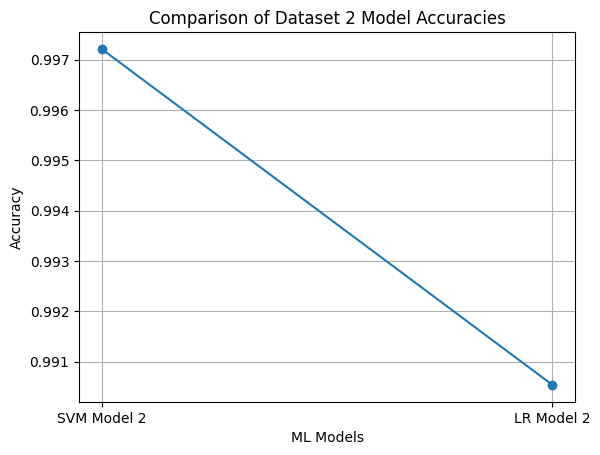

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values for SVM model 1 and model 2
accuracy_svm2 = 0.9972160356347439
accuracy_LR2 = 0.9905345211581291

# Model names
models = ['SVM Model 2', 'LR Model 2']

# Create a line graph
plt.plot(models, [accuracy_svm2, accuracy_LR2], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('ML Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Dataset 2 Model Accuracies')

# Display the graph
plt.grid(True)
plt.show()


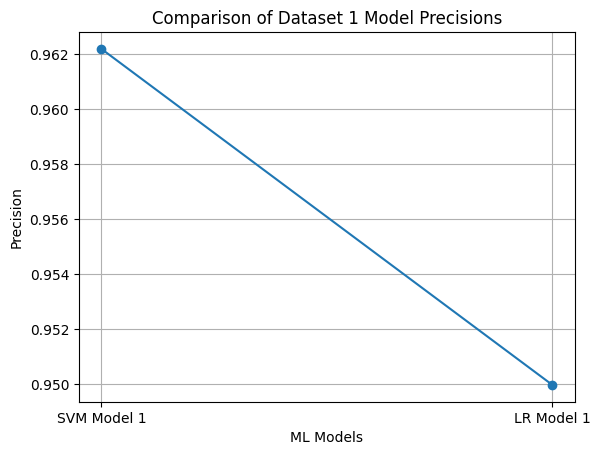

In [ ]:
import matplotlib.pyplot as plt

# Precision values for SVM model 1 and LR model 1
Precision_svm1 = 0.9621870209504343
Precision_LR1 = 0.9499744767738643

# Model names
models = ['SVM Model 1', 'LR Model 1']

# Create a line graph
plt.plot(models, [Precision_svm1, Precision_LR1], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('ML Models')
plt.ylabel('Precision')
plt.title('Comparison of Dataset 1 Model Precisions')

# Display the graph
plt.grid(True)
plt.show()


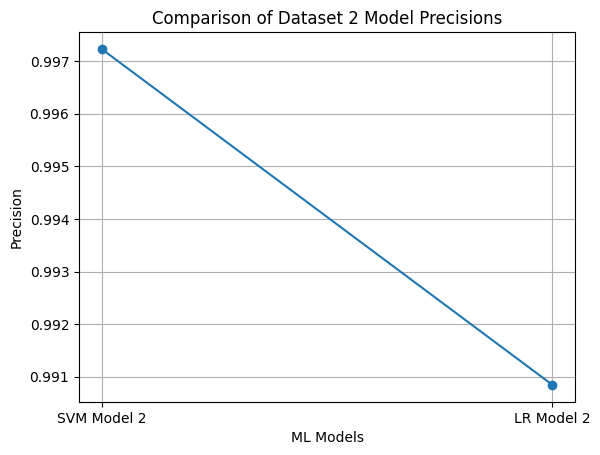

In [ ]:
import matplotlib.pyplot as plt

# Precision values for SVM model 2 and LR model 2
Precision_svm2 = 0.9972322759208005
Precision_LR2 = 0.990845220353417

# Model names
models = ['SVM Model 2', 'LR Model 2']

# Create a line graph
plt.plot(models, [Precision_svm2, Precision_LR2], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('ML Models')
plt.ylabel('Precision')
plt.title('Comparison of Dataset 2 Model Precisions')

# Display the graph
plt.grid(True)
plt.show()


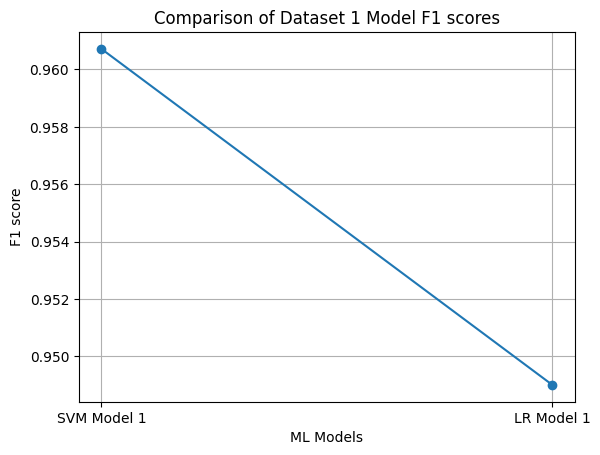

In [ ]:
import matplotlib.pyplot as plt

# F1score values for SVM model 1 and LR model 1
F1score_svm1 = 0.9607142857142857
F1score_LR1 = 0.9490056093829679

# Model names
models = ['SVM Model 1', 'LR Model 1']

# Create a line graph
plt.plot(models, [F1score_svm1,F1score_LR1], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('ML Models')
plt.ylabel('F1 score')
plt.title('Comparison of Dataset 1 Model F1 scores')

# Display the graph
plt.grid(True)
plt.show()


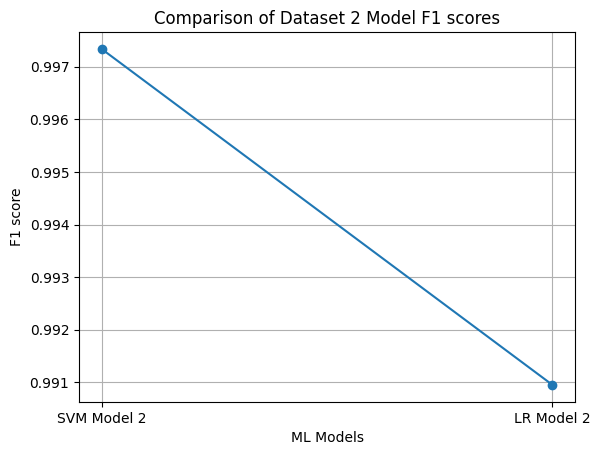

In [ ]:
import matplotlib.pyplot as plt

# F1score values for SVM model 2 and LR model 2
F1score_svm2 = 0.9973384435217715
F1score_LR2 = 0.9909507079740233

# Model names
models = ['SVM Model 2', 'LR Model 2']

# Create a line graph
plt.plot(models, [F1score_svm2,F1score_LR2], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('ML Models')
plt.ylabel('F1 score')
plt.title('Comparison of Dataset 2 Model F1 scores')

# Display the graph
plt.grid(True)
plt.show()


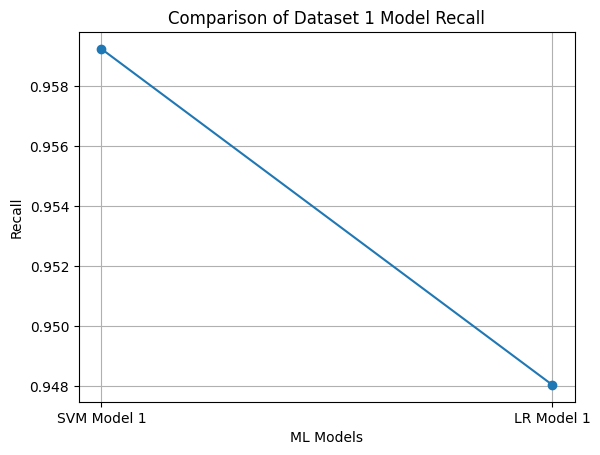

In [ ]:
import matplotlib.pyplot as plt

# Recall values for SVM model 1 and LR model 1
Recall_svm1 = 0.9592460519612838
Recall_LR1 =  0.9480387162506367

# Model names
models = ['SVM Model 1', 'LR Model 1']

# Create a line graph
plt.plot(models, [Recall_svm1,Recall_LR1], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('ML Models')
plt.ylabel('Recall')
plt.title('Comparison of Dataset 1 Model Recall')

# Display the graph
plt.grid(True)
plt.show()


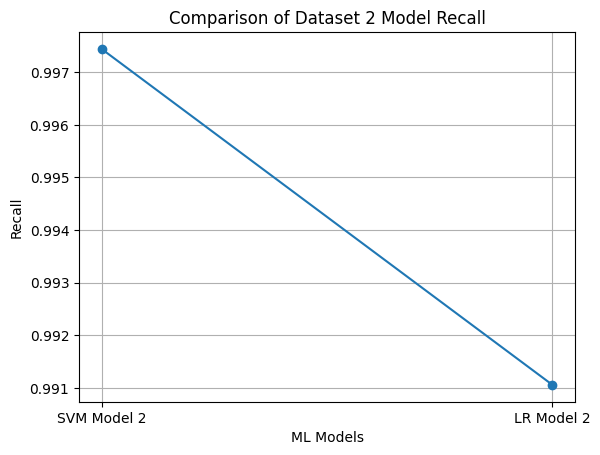

In [ ]:
import matplotlib.pyplot as plt

# Recall values for SVM model 2 and LR model 2
Recall_svm2 = 0.9974446337308348
Recall_LR2 =   0.9910562180579217

# Model names
models = ['SVM Model 2', 'LR Model 2']

# Create a line graph
plt.plot(models, [Recall_svm2,Recall_LR2], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('ML Models')
plt.ylabel('Recall')
plt.title('Comparison of Dataset 2 Model Recall')

# Display the graph
plt.grid(True)
plt.show()


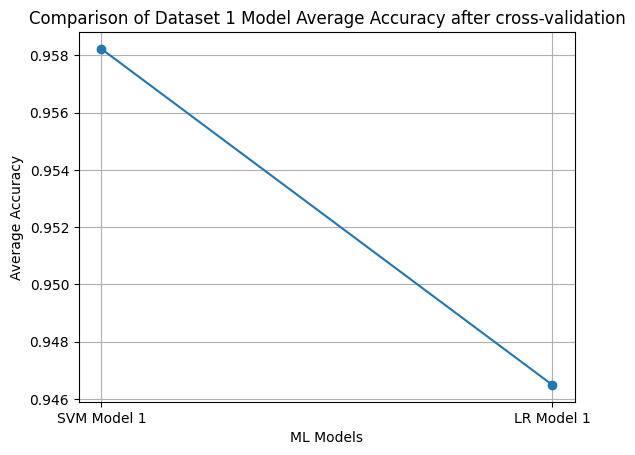

In [ ]:
import matplotlib.pyplot as plt

# Accuracy after cross-validation values for SVM model 1 and LR model 1
cv_avg_accuracy_svm1 = 0.9582240162323314
cv_avg_accuracy_LR1 =  0.946493166004154

# Model names
models = ['SVM Model 1', 'LR Model 1']

# Create a line graph
plt.plot(models, [cv_avg_accuracy_svm1,cv_avg_accuracy_LR1], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('ML Models')
plt.ylabel('Average Accuracy')
plt.title('Comparison of Dataset 1 Model Average Accuracy after cross-validation')

# Display the graph
plt.grid(True)
plt.show()


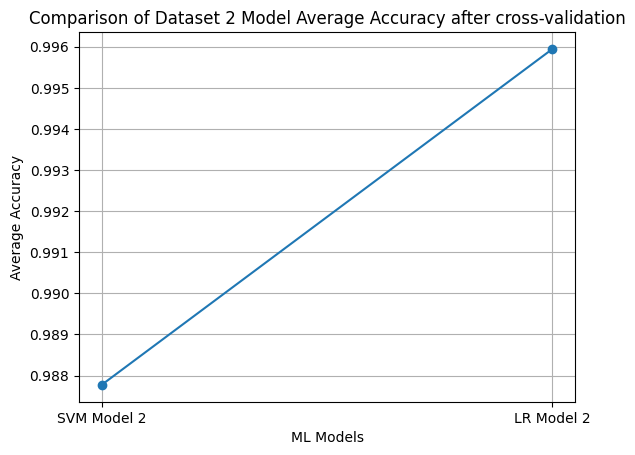

In [ ]:
import matplotlib.pyplot as plt

# Accuracy after cross-validation values for SVM model 2 and LR model 2
cv_avg_accuracy_svm2 = 0.9877722838433783
cv_avg_accuracy_LR2 = 0.9959463673214843

# Model names
models = ['SVM Model 2', 'LR Model 2']

# Create a line graph
plt.plot(models, [cv_avg_accuracy_svm2,cv_avg_accuracy_LR2], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('ML Models')
plt.ylabel('Average Accuracy')
plt.title('Comparison of Dataset 2 Model Average Accuracy after cross-validation')

# Display the graph
plt.grid(True)
plt.show()
